#### This project aims to extract the features of tweets and analyze the opinion of tweets as positive, negative or neutral.

Questionnaires and surveys are no longer sufficient to know the opinions of people in the presence of big data, so I now use sentiment analysis, In the sense of analyzing people's feelings and perspectives through what they write and in particular, I want to know the people's Sentiment and emotions in the pandemic Covid -19.

Input: Textual content of a tweet

Output: Label signifying if the sentiment of the tweet is positive/negative

The provided dataset (COVID19 Tweets) consists of 179108 tweets (179108 rows × 13 columns). The dataset can be found at Kaggle

# Importing the necessary libraries:

In [61]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import re
import string
from string import punctuation
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# download all the bells & whistles of nltk library
# nltk.download('vader_lexicon')
# nltk.download('stopwords')
# nltk.download('wordnet')
#nltk.download("punkt")


# Read COVID-19 Tweet .csv file 

In [62]:
# Load data
df = pd.read_csv('/Users/taifalwafii/Downloads/covid19_tweets.csv')
# Take a look at the first few rows
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


# Exploratory Data Analysis

In [63]:
#check shape of data 
df.shape

(179108, 13)

In [64]:
# Take a look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [65]:
#descriptive statistics summary
df.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [69]:
# check missing values
df.isnull().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

In [70]:
print('Total tweets in this data: {}'.format(df.shape[0]))
print('Total Unique Users in this data: {}'.format(df['user_name'].nunique()))
print('Total Unique location in this data: {}'.format(df['user_location'].nunique()))
print('Total Unique hashtags in this data: {}'.format(df['hashtags'].nunique()))

Total tweets in this data: 179108
Total Unique Users in this data: 92276
Total Unique location in this data: 26920
Total Unique hashtags in this data: 52640


In [71]:
# check first tweet
print(df['text'][0])

If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0


In [72]:
# check hashtags unique values
df['hashtags'].unique()

array([nan, "['COVID19']", "['CoronaVirusUpdates', 'COVID19']", ...,
       "['COVID19', 'coronavirus', 'TrumpVirus']",
       "['COVID19', 'CloseTheSchools', 'KeepTheSchoolsClosed', 'KeepTeachersAlive', 'K12']",
       "['nurses', 'COVID19', 'coronavirus', 'schools']"], dtype=object)

In [73]:
# check user_location unique values
df['user_location'].unique()

array(['astroworld', 'New York, NY', 'Pewee Valley, KY', ...,
       'Newton, NJ', 'T.O.', 'Aliwal North, South Africa'], dtype=object)

In [74]:
def plot_chart(feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(15,5))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweets '.format(feature))
    plt.ylabel('Frequency')
    plt.xlabel(title)
    plt.xticks(rotation=90)
    plt.show()
    

looking here plot , we find that 2.09% of users are from India

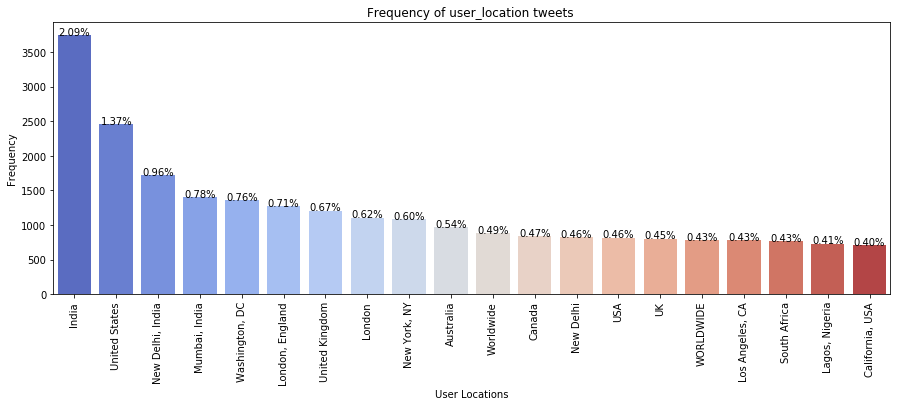

In [75]:
plot_chart('user_location', 'User Locations', 'coolwarm')

looking here plot , we find that 21.10% of users write in #COVID19 hashtags

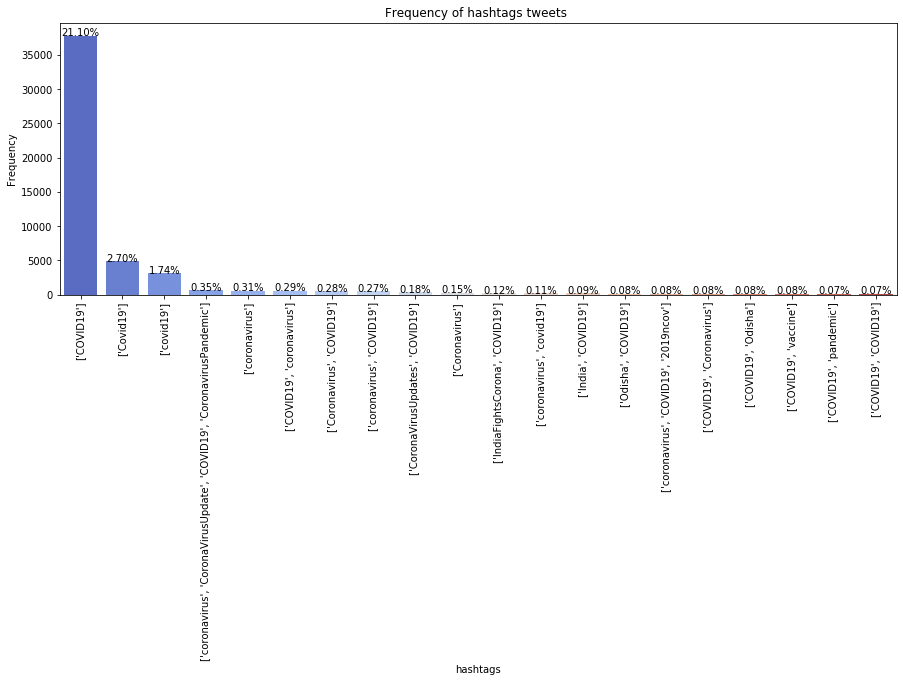

In [76]:
plot_chart('hashtags', 'hashtags', 'coolwarm')

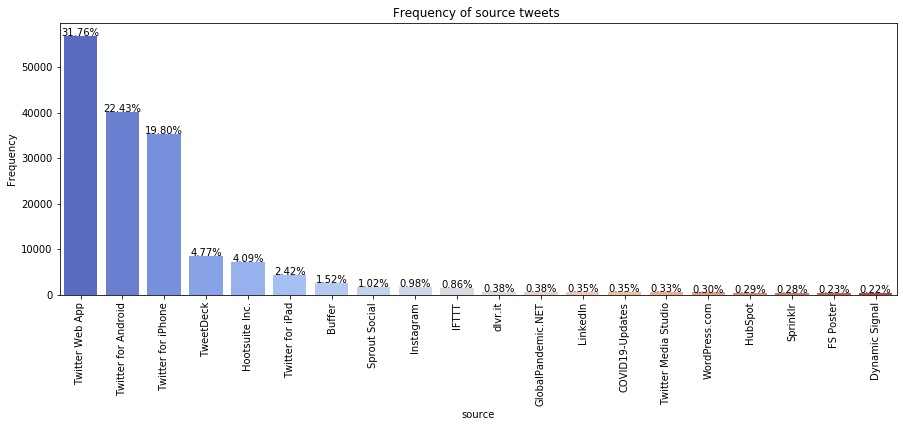

In [77]:
plot_chart('source', 'source', 'coolwarm')

In the below output cell , The heatmap of dataframe shows correlations between `user_favourites` and `user_followers`

In [78]:
# View the correlations
df.corr()

,user_followers,user_friends,user_favourites,user_verified,is_retweet
user_followers,1.000000,-0.003580,-0.029218,0.320957,NaN
user_friends,-0.003580,1.000000,0.201050,0.012829,NaN
user_favourites,-0.029218,0.201050,1.000000,-0.061141,NaN
user_verified,0.320957,0.012829,-0.061141,1.000000,NaN
is_retweet,NaN,NaN,NaN,NaN,NaN


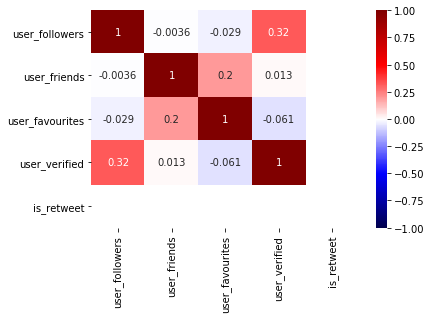

In [79]:
#corr matrix
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

# **Data Preprocessing**
### preprocess text using some NLP tchniques like:

- Converting to lowercase 
- Remove text in square brackets,
- Remove links,
- Remove punctuation
- Remove words containing numbers
- Removing stopwords
- Lemmatization

In [80]:
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [81]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) #???
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text) 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.split()
    text = [word for word in text if word not in stopwords.words('english')] 
    text = [lemmatizer.lemmatize(word) for word in text]
    text = ' '.join(text)
    return text

In [82]:
df['text'] = df['text'].apply(lambda x: clean_text(x))
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,smelled scent hand sanitizers today someone pa...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,hey yankee yankeespr mlb wouldnt made sense pl...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,wdunlap realdonaldtrump trump never claimed ho...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,brookbanktv one gift give appreciation simple ...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,july medium bulletin novel coronavirusupdates ...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [83]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [84]:
df['text']=df['text'].apply(lambda x: remove_emoji(x))

# **Sentiment Anlaysis for Tweets**

In [85]:
# Create a SentimentIntensityAnalyzer object.
sent = SentimentIntensityAnalyzer()

In [86]:
# polarity_scores method of SentimentIntensityAnalyzer
# object gives a sentiment dictionary.
# which contains pos, neg, and compound scores.
def check_sentiment(x):
    return sent.polarity_scores(x)['compound']

In [87]:
df['compound_score'] = df['text'].apply(lambda x: check_sentiment(x))

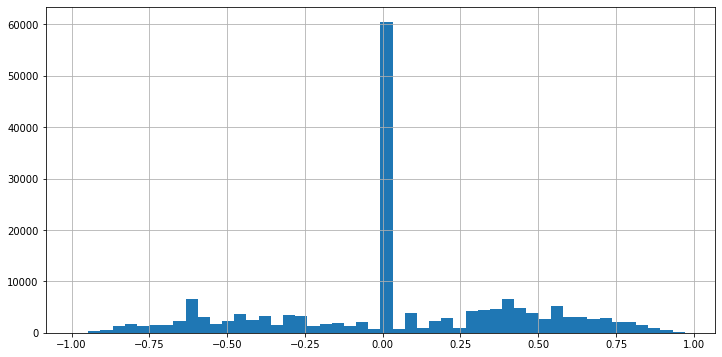

In [88]:
df['compound_score'].hist(bins=50, figsize=(12,6))

In [89]:
def generate_label(x):
    return 1 if x>0 else 0

In [90]:
df['Label'] = df['compound_score'].apply(lambda x: generate_label(x))

In [91]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,compound_score,Label
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,smelled scent hand sanitizers today someone pa...,NaN,Twitter for iPhone,False,0.4939,1
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,hey yankee yankeespr mlb wouldnt made sense pl...,NaN,Twitter for Android,False,0.4019,1
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,wdunlap realdonaldtrump trump never claimed ho...,['COVID19'],Twitter for Android,False,0.2057,1
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,brookbanktv one gift give appreciation simple ...,['COVID19'],Twitter for iPhone,False,0.7351,1
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,july medium bulletin novel coronavirusupdates ...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,0.3182,1


In [ ]:
Fig = px.pie(
    df,
    names='Label',
    title='Sentiment Chart',
    color_discrete_sequence=px.colors.sequential.Agsunset)

Fig.show()

## **Model**

In [93]:
x_train , x_test , y_train , y_test = train_test_split(df.text , df.Label , test_size = 0.2 , random_state = 3 )
print("x_train shape : ", x_train.shape)
print("y_train shape : ", y_train.shape)
print("x_test shape : ", x_test.shape)
print("y_test shape : ", y_test.shape)

x_train shape :  (143286,)
y_train shape :  (143286,)
x_test shape :  (35822,)
y_test shape :  (35822,)


In [94]:
# Instantiate the vectorizer
cv = TfidfVectorizer()

In [95]:
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test) #transform the x_test to sparse matrix
x_train.toarray().shape

(143286, 121761)

**Logistic regression** ( Best model )

In [106]:
# define models and parameters
lr = LogisticRegression() # LogisticRegression(C=10, penalty='l1', solver='liblinear')
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2']
C = [100, 10, 1.0, 0.1, 0.01, 0.001]

In [107]:
# define grid search
grid = dict(solver=solvers, penalty=penalty, C=C)
cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=123)
lr2 = GridSearchCV(estimator=lr, param_grid=grid, cv=cv1, 
                            scoring='accuracy',error_score=0, iid=True)

lr_result = lr2.fit(x_train, y_train)


/Users/taifalwafii/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/taifalwafii/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/taifalwafii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/taifalwafii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.


/Users/taifalwafii/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_

In [108]:
best_model = lr_result.best_estimator_

In [109]:
y_pred = best_model.predict(x_test)

In [110]:
best_model

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     22067
           1       0.93      0.93      0.93     13755

    accuracy                           0.94     35822
   macro avg       0.94      0.94      0.94     35822
weighted avg       0.94      0.94      0.94     35822



In [112]:
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*best_model.score(x_train, y_train)))
print("Test set: {:6.2f}%".format(100*best_model.score(x_test, y_test)))

The score for logistic regression is
Training:  99.03%
Test set:  94.36%


In [113]:
print("lr confusion matrix: \n\n", confusion_matrix(y_test, y_pred))

lr confusion matrix: 

 [[21035  1032]
 [  989 12766]]


**Naive bayes**

In [114]:
nb = BernoulliNB()
nb.fit(x_train,y_train)
nb.score(x_test,y_test)

0.8476355312377868

In [117]:
print("The score for Naive bayes is")
print("Training: {:6.2f}%".format(100*nb.score(x_train, y_train)))
print("Test set: {:6.2f}%".format(100*nb.score(x_test, y_test)))

The score for Naive bayes is
Training:  91.18%
Test set:  84.76%


**Neural Network**

In [118]:
# Hyper Parameters
vocab_size = 1000
embedding_dim =16 
max_length = 50
trunc_type='post'
oov_tok = "<OOV>"

In [119]:
x_train_nn , x_test_nn , y_train_nn, y_test_nn = train_test_split(df.text , df.Label , test_size = 0.2 , random_state = 0 )
print("x_train shape : ", x_train_nn.shape)
print("y_train shape : ", y_train_nn.shape)
print("x_test shape : ", x_test_nn.shape)
print("y_test shape : ", y_test_nn.shape)

x_train shape :  (143286,)
y_train shape :  (143286,)
x_test shape :  (35822,)
y_test shape :  (35822,)


In [120]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train_nn)
word_index = tokenizer.word_index

In [121]:

training_sequences = tokenizer.texts_to_sequences(x_train_nn)
training_padded = pad_sequences(training_sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(x_test_nn)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

training_label=y_train_nn
testing_label=y_test_nn

In [122]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 16,289
Trainable params: 16,289
Non-trainable params: 0
_________________________________________________________________


In [123]:
num_epochs = 20
history=model.fit(training_padded, training_label, epochs=num_epochs, validation_data=(testing_padded, testing_label))

Epoch 1/20
4478/4478 [==============================] - 4s 962us/step - loss: 0.4571 - accuracy: 0.7938 - val_loss: 0.3757 - val_accuracy: 0.8577
Epoch 2/20
4478/4478 [==============================] - 4s 922us/step - loss: 0.3693 - accuracy: 0.8602 - val_loss: 0.3724 - val_accuracy: 0.8592
Epoch 3/20
4478/4478 [==============================] - 4s 852us/step - loss: 0.3662 - accuracy: 0.8611 - val_loss: 0.3744 - val_accuracy: 0.8593
Epoch 4/20
4478/4478 [==============================] - 4s 904us/step - loss: 0.3627 - accuracy: 0.8618 - val_loss: 0.3656 - val_accuracy: 0.8601
Epoch 5/20
4478/4478 [==============================] - 4s 983us/step - loss: 0.3560 - accuracy: 0.8627 - val_loss: 0.3828 - val_accuracy: 0.8500
Epoch 6/20
4478/4478 [==============================] - 5s 1ms/step - loss: 0.3510 - accuracy: 0.8635 - val_loss: 0.3581 - val_accuracy: 0.8615
Epoch 7/20
4478/4478 [==============================] - 4s 869us/step - loss: 0.3476 - accuracy: 0.8637 - val_loss: 0.3570 - v

SVM

In [ ]:
#Create a svm Classifier
svm_result = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
svm_result.fit(x_train, y_train)


In [125]:
#Predict the response for test dataset
y_pred_svm = svm_result.predict(x_test)

In [126]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     22067
           1       0.92      0.93      0.92     13755

    accuracy                           0.94     35822
   macro avg       0.94      0.94      0.94     35822
weighted avg       0.94      0.94      0.94     35822



In [127]:
print("The score for svm is")
print("Training: {:6.2f}%".format(100*svm_result.score(x_train, y_train)))
print("Test set: {:6.2f}%".format(100*svm_result.score(x_test, y_test)))

The score for svm is
Training:  96.21%
Test set:  94.17%
